## Python for Web

### Outline
In this lesson, we will learn:

Web fundamentals for full-stack development with Python
How to consume web services in python to expand capabilities using requests
How to package our application into a web application using Flask

Note: Python web development is a complex topic (so much so that there is an entire [Nanodegree](https://www.udacity.com/course/full-stack-web-developer-nanodegree--nd0044) program dedicated to full-stack development using Python). We can't possibly cover all of the details here, so our goal in this lesson is not to go into great depth on the topics—but rather, to take a tour through some of the big ideas behind how Python can be used within web systems, so that by the end of the lesson you'll have a feeling for whether this is a path you want to explore further.


### Web Basics
### The Internet Simplified

### Requests
A network command is often referred to as a request. You can think of a request as a structured command sent over a network between two computers.

The HyperText Transfer Protocol (HTTP) is the protocol—or set of rules—governing how requests are sent over the Internet, and it has a clear and rigid definition for how requests can be made. We won't get too much into HTTP, but let's have a look at some of the details we'll need for this course.

### Response
After a request is processed, a server provides a response with the results. This response includes a similar structure as a request so the client can easily interpret the results.

### Using Python with the Internet
Python can be used to either download information from the internet or to send information to the internet. We call these consuming and serving information, respectively. Python can be used to achieve either goal!

### Additional Resources
Boto3 Docs https://boto3.readthedocs.io/
Request Docs https://requests.readthedocs.io/en/master/
Urllib3 Docs https://urllib3.readthedocs.io/en/latest/
Flask Docs https://flask.palletsprojects.com/
Django Docs https://docs.djangoproject.com/

### Umbrella Decision¶

Try it!¶
We'll be consuming the Open Weather API to download realtime weather data in our


### The Weather Service¶

Try it!
We'll be using the requests library to perform a GET request from the Open Weather API. First, we need to install requests:


pip install requests
Next, we can complete the WeatherService.getForecast method in the weatherService.py file (top right).

Your tasks are:

Define the baseurl ('https://api.openweathermap.org/data/2.5/forecast') and appId (from the previous step)
Use the requests.get method to call the URL, providing the following query params:
The query (q, f'{city},{country}')
The mode ('mode', 'json')
The appId ('APPID', appId)
Parse the response using response.json() and provide the data in the list key from this response body. The method should return this data.

Try it!
Complete the umbrella.py file to make a decision if we'll need an umbrella in a specific city.

Your tasks:

Fetch data from the API using your WeatherService.getForecast method.
Filter this data to only include information for the next 12 hours.
Determine if there is a high probability of rain in the remaining data.
Return True or False to answer the question of whether we need an umbrella. Print a helpful message based on this result.
Practice using the argparse module to dynamically ask a user for a city and country.
Tip: It might be helpful to use an online JSON Parser to help you to navigate the provided JSON data.

In [ ]:
# weatherService.py

import requests

class WeatherService:
    baseUrl = 'https://api.openweathermap.org/data/2.5'
    appId = '18fe102b63df96ae75952f0868ce7c05'

    @classmethod
    def getForecast(cls, city="new york", country="us"):
        url = f'{cls.baseUrl}/forecast'

        response = requests.get(url, params=[
            ('q', f'{city},{country}'),
            ('mode', 'json'),
            ('APPID', cls.appId)
            ])

        data = response.json()

        return data['list']

if __name__ == "__main__":
    print(WeatherService.getForecast())

#weatherservice.py

In [ ]:
import time
from weatherService import WeatherService
import argparse

def within_time(item, start, end):
    return item['dt'] > start and item['dt'] < end


def makeUmbrellaDecision(city, country) -> bool:
    current_time = time.time()
    end_time = current_time + 12*3600
    wx = WeatherService.getForecast(city, country)
    wx = [x for x in wx if within_time(x, current_time, end_time)]
    rain_probability = [x['rain']['3h'] for x in wx if 'rain' in x]
    if len(rain_probability) > 0 and max(rain_probability) > 0.1:
        return True
    else:
        return False

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Decide if we need an umbrella.')
    parser.add_argument('--city', type=str, default='new york',
                        help='city to check')
    parser.add_argument('--country', type=str, default='us',
                        help='city to check')
    args = parser.parse_args()

    city=args.city
    country=args.country

    if(makeUmbrellaDecision(city, country)):
        print(f'You need an umbrella today in {city}, {country}')
    else:
        print(f'You do NOT need an umbrella today in {city}, {country}')

### Saving from Web to Disk with Requests¶

Try it!
Try using requests and the Python standard open method to download an image and write the data to a file on the disk.

Your tasks:

Use requests to request an image from a URL. The data will be stored in r.content.
Generate a random filename to which you'll save the content.
Use the open method to write the content from step 1 to the file in step 2.
Here are a few image urls for you to try:

https://images.ctfassets.net/2y9b3o528xhq/4swf2qhcelEUWzKHaKne6C/d890de3220ea332fb42e9b8e5f7848fd/real-world-projects.png
https://images.ctfassets.net/2y9b3o528xhq/5sXS0Rr3MEr66P5elfYX7P/3728cc2d85c0979cb29d5cb291369038/mentor.jpg
https://images.ctfassets.net/2y9b3o528xhq/5p7HANmA1jsw8P9EVOeVso/cbfa17357399d99a76d641c777e81a81/self-paced.png

In [ ]:
import requests
import random

image_url = 'https://images.ctfassets.net/2y9b3o528xhq/4swf2qhcelEUWzKHaKne6C/d890de3220ea332fb42e9b8e5f7848fd/real-world-projects.png'
r = requests.get(image_url, allow_redirects=True)
tmp = f'./tmp/{random.randint(0, 100000000)}.png'
open(tmp, 'wb').write(r.content)

print(tmp)

### Server Basics
#### What is a Server?
After developing useful software that solves a problem, we might want to make this service available to others through the web. We can serve this application through specialized software that is designed to handle networked requests and responses. We call this software a server.
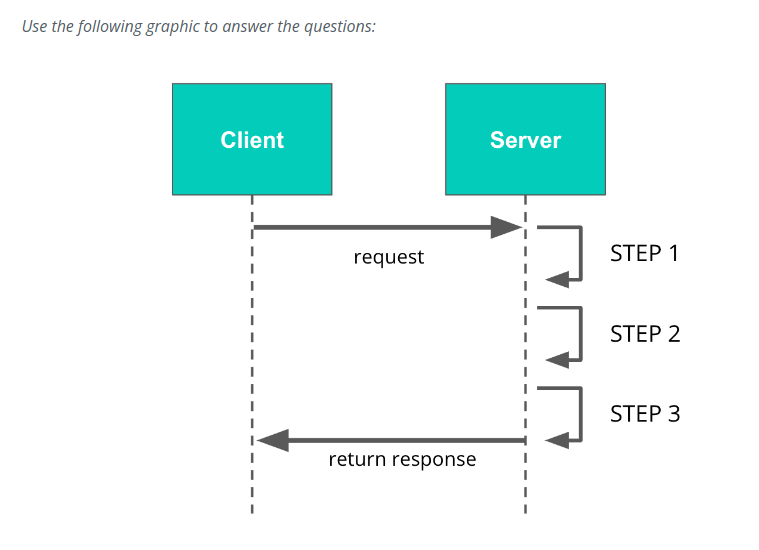


### Setting Up the Server Framework¶

Try it!
Before you get started, make sure you have the latest version of flask installed by running:


pip install flask -U

To start the flask server, run:


export FLASK_APP=app.py
flask run --host 0.0.0.0 --port 3000 --reload
Note: the host and port are required to access the server from within this notebook.

Finally, add a few other end points by using the home method @app.route as a template and replacing the uri ('/') and the method name home.



In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return 'yo'

@app.route('/')
def candy():
    return 'chocolate'

@app.route('/')
def greeting():
    return 'hello!'

### Performing Actions on our Server¶

Open Preview

Try it!
We'll be using the WeatherService we've defined in a previous exercise. First, we need to make sure that we're using a valid API key. To do this, replace the appId variable in weatherService.py with your API Key from OpenWeatherMap.

Next, import the makeUmbrellaDecision method from the umbrella module and perform the action in the home method.

In [ ]:
#app.py

In [ ]:
from flask import Flask
from umbrella import makeUmbrellaDecision
app = Flask(__name__)

@app.route('/')
def home():
    if makeUmbrellaDecision('new york', 'us'):
        return 'Bring an umbrella'
    else:
        return 'No need for an umbrella'

### User Input with Query Params¶


Open Preview

Finally, let's add user input using a query parameter. A query parameter is specified at the end of the url, following a question mark: ?name=value&name2=value2.

We can access these variables using: request.args.get(param_name).

Your task:

Refactor the city variable to take a query param.
If the city is not set, specify a default value.

In [ ]:
#app.py
from flask import Flask, request
from umbrella import makeUmbrellaDecision
app = Flask(__name__)

@app.route('/')
def home():
    city = request.args.get('city')
    if city is None:
        city = 'new york'
    if makeUmbrellaDecision(city, 'us'):
        return 'Bring an umbrella'
    else:
        return 'No need for an umbrella'

Python Paths - Full Stack Developer
Note: This is an optional reading for students interested in pursuing Python for full-stack web development. If that's not you, feel free to move on to the next page.

As you continue to develop your Python skills, you may find that you want to focus on a more specialized domain that interests you. On this page, we'll talk about how Python can be used in full-stack web development, so that you can get a better idea of whether this path is something you want to pursue further.

The Problem
As developers, we often aim to help as many people with our software as possible. In theory, our thoughts and ideas can scale to reach everyone who might benefit from them. For many of us, this is one of the most exciting aspects of our jobs.

However, scaling software has challenges. For instance, in the past software has traditionally been deployed through an installable file that would run locally on a user’s computer. This technique has limits that make mass adoption difficult:

Updates require changes on many machines
Local computing resources (CPU, Ram, GPU) are limited
Each computer may have a different configuration
Each platform (Windows, Mac, Linux) may require customization
Deploying our application on a web based “stack” addresses these problems. Since our code will run on a cloud-based system the user does not need to manage installations or environment settings. Additionally, we have full control over the machines we deploy to - which can have far more resources than would be possible if we were installing on a local machine.

The Skills You’ve Learned
In this lesson, we explored writing Python code to create services that live on the web. Since these frameworks are written in Python, we can easily write solutions that can scale.

The Next Steps - Designing and Deploying for Scale
Building Standardized Server Interfaces
We covered the basics of web services in this lesson, but this is just a taste to get you started. If you’re interested in developing applications for the cloud, the next steps are to learn how you can connect services via standardized interfaces, understand auth principles to allow specific access to your service, and dive into the world of databases to store persistent user data. If these topics interest you, here are some resources you might enjoy:

Designing a RESTful API with Python and Flask  https://blog.miguelgrinberg.com/post/designing-a-restful-api-with-python-and-flask
Token-Based Authentication with Flask https://realpython.com/token-based-authentication-with-flask/
Connect Flask to a Database https://hackersandslackers.com/flask-sqlalchemy-database-models/
Deploying your Application to the Cloud
Modern cloud platforms give us full control of how we can deploy our service, and this allows us to create powerful, scalable services that exceed what would be possible on a local computer. For example, we can easily deploy our application using a service called Heroku which will run our application using a single command-line call. This type of tool is often called Infrastructure as a Service (IaaS). Using IaaS allows us to scale (or increase computing resources for) the service easily so we can focus on writing our Python application, while easily configuring the complexity of web deployments.

As you become more comfortable with cloud technologies, you’ll probably seek out more customizable ways to deploy your applications. Amazon Web Services, Microsoft Azure, and Google Cloud Platform have a range of products to help you build highly available, redundant applications that are capable of running software written in the Python Language.

If these topics interest you, you might want to check out:

Deploying a Python Flask App to Heroku https://medium.com/the-andela-way/deploying-a-python-flask-app-to-heroku-41250bda27d0
Deploying a Flask Application to Elastic Beanstalk on AWS https://docs.aws.amazon.com/elasticbeanstalk/latest/dg/create-deploy-python-flask.html
Continue Learning
If using Python as a full-stack developer or cloud developer is a path you want to pursue, there are many great resources to continue your learning. In addition to what we already linked about, you might want to check out these other Udacity Nanodegrees:

Full Stack Web Developer https://www.udacity.com/course/full-stack-web-developer-nanodegree--nd0044
Cloud Developer Nanodegree https://www.udacity.com/course/cloud-developer-nanodegree--nd9990


